### **Import dataset**

In [1]:
import pandas as pd

In [3]:
delaney_with_descriptors_url = '/content/881scrambling.csv'
dataset = pd.read_csv(delaney_with_descriptors_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.97
1,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.51
2,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.30
3,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.32
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.28
350,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.29
351,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.30
352,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.31


### **X,Y scrambling**

In [4]:
# Data set
X = dataset.drop(['pIC50'], axis=1)
Y = dataset.iloc[:,-1]

In [5]:
Y.sample(frac=1, replace=False, random_state=0)

6      6.72
140    4.99
300    3.92
218    6.38
90     4.70
       ... 
323    4.09
192    3.68
117    4.87
47     4.49
172    6.10
Name: pIC50, Length: 354, dtype: float64

In [7]:
# Model from original X-Y pairs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data set
X = dataset.drop(['pIC50'], axis=1)
Y = dataset.iloc[:,-1]
# Data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# Y-Shuffling

# Model building
model = LinearRegression()
model.fit(X_train, Y_train)
# Make prediction
Y_train_pred = model.predict(X_train)
# Compute R2 score
r2a = r2_score(Y_train, Y_train_pred)
# Print R2 score
r2a

0.9892311801204539

### **Scatter plot**

Text(0.5, 0, 'Experimental pIC50')

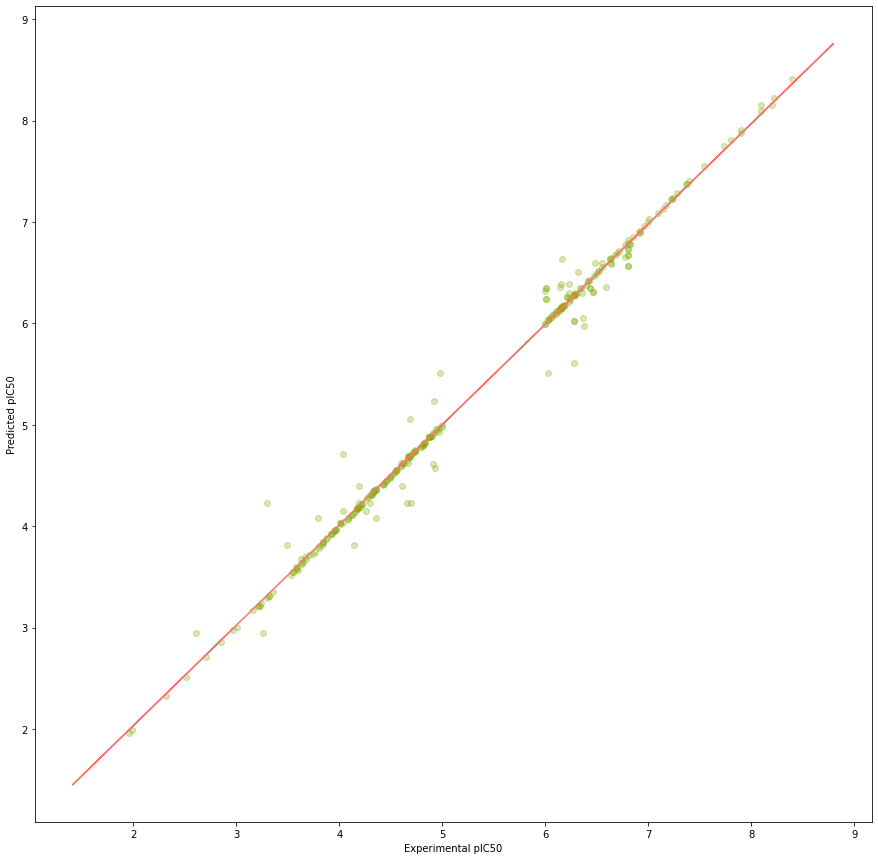

In [8]:
# Plot of predicted vs actual
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,15))
plt.scatter(x=Y_train, y=Y_train_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y_train, Y_train_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')


### **Build Y-scrambled models**

In [9]:
# Build Y-scrambled models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

r2_train_list = []

# Data set
X = dataset.drop(['pIC50'], axis=1)
Y = dataset.iloc[:,-1]
# Data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

for i in range(1000):
  # Y-Shuffling
  Y_train = Y_train.sample(frac=1, replace=False, random_state=i)
  # Model building
  model = LinearRegression()
  model.fit(X_train, Y_train)
  # Make prediction
  Y_train_pred = model.predict(X_train)
  # Compute R2 score
  r2b = r2_score(Y_train, Y_train_pred)
  r2_train_list.append(r2b)
# Print R2 score
r2_train_list

[0.7940942804798705,
 0.6714338734174012,
 0.7588828728172285,
 0.8642282789732912,
 0.8138539913709367,
 0.6516612650902437,
 0.8025846170853439,
 0.8237762095912775,
 0.7605316992065254,
 0.7891101858392393,
 0.8767195727455304,
 0.7872304623970545,
 0.8070126801914935,
 0.8525507807543613,
 0.8460414833513986,
 0.7723340450040715,
 0.7879057907764464,
 0.8297628821887202,
 0.7945587162777945,
 0.8299475324129757,
 0.8781478104261243,
 0.8083905892726752,
 0.7542754530334143,
 0.8292528564159071,
 0.8372957335574526,
 0.74445752810056,
 0.7667540206626667,
 0.7220320813418708,
 0.826273652441708,
 0.8458814283003716,
 0.8791948810916503,
 0.830977916409955,
 0.8021455829363213,
 0.798932761218918,
 0.8362419518679105,
 0.7760851505868619,
 0.8430295127313676,
 0.8550503694043213,
 0.851067202066502,
 0.8420405391499834,
 0.8323101897576426,
 0.7417462290636913,
 0.6928767677317385,
 0.7638815394948597,
 0.8381177442839405,
 0.829653114027098,
 0.7042767768009606,
 0.834674971361169,


[(0.0, 1.0)]

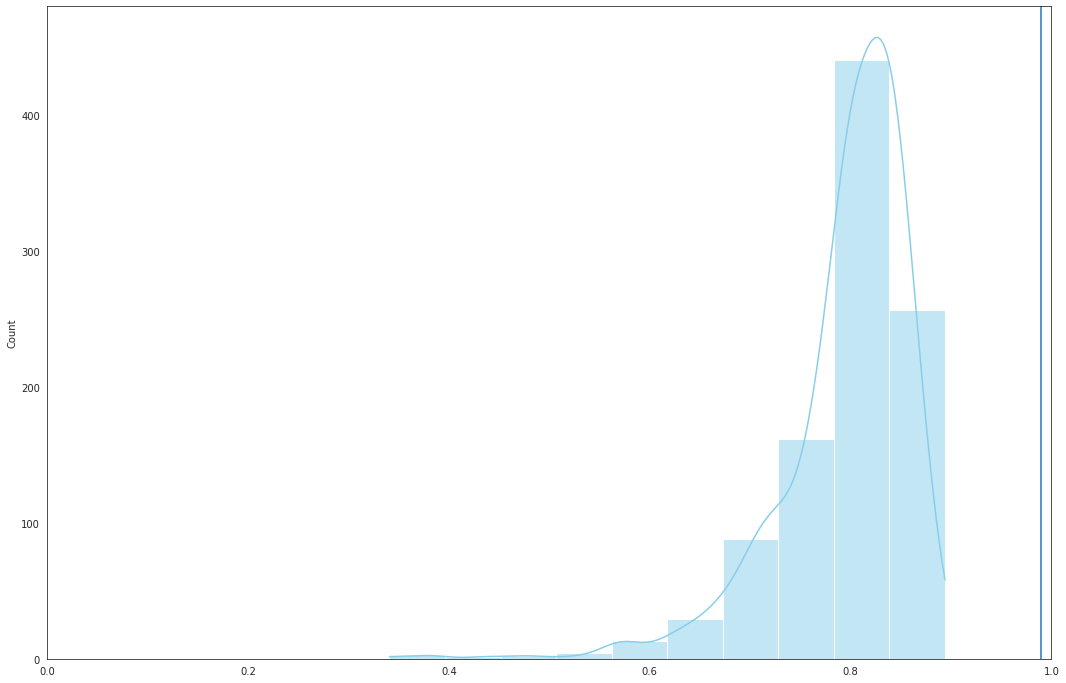

In [10]:
# Histogram plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("white")
plt.figure(figsize = (18, 12)) 

ax = sns.histplot(data=r2_train_list, color="skyblue", kde=True, bins = 10)
plt.axvline(r2a)
ax.set(xlim=(0, 1))